In [49]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

In [53]:
dataset = pd.read_csv('Auto_theft.csv')

In [17]:
dataset.shape

(1865, 8)

In [18]:
dataset.describe()

,Year,AutoTheftCoordinatedTraced,AutoTheftRecovered,AutoTheftStolen,SuccessRate
count,1865.000000,1865.000000,1865.000000,1865.000000,1865.000000
mean,2005.564075,60.712064,293.580161,1027.655764,0.491897
std,2.853598,245.548399,673.259236,2397.745238,0.327133
min,2001.000000,0.000000,1.000000,1.000000,0.018868
25%,2003.000000,0.000000,3.000000,7.000000,0.253180
50%,2006.000000,0.000000,27.000000,80.000000,0.390977
75%,2008.000000,14.000000,172.000000,521.000000,0.701157
max,2010.000000,2985.000000,5453.000000,18605.000000,6.000000


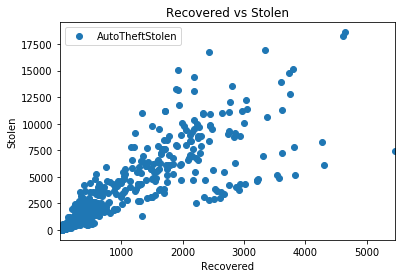

In [21]:
dataset.plot(x='AutoTheftRecovered', y='AutoTheftStolen', style='o')  
plt.title('Recovered vs Stolen')  
plt.xlabel('Recovered')  
plt.ylabel('Stolen')  
plt.show()

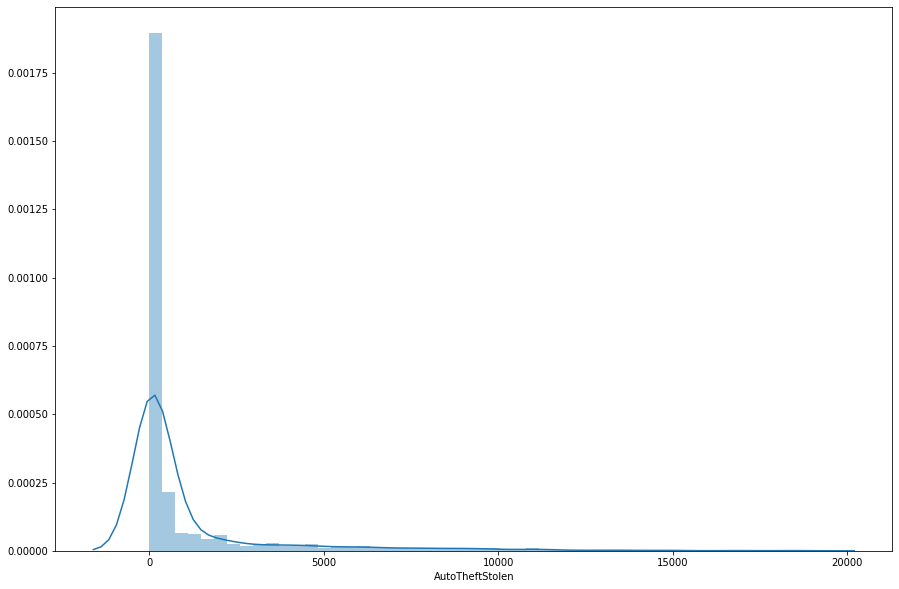

In [22]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['AutoTheftStolen'])

In [23]:
X = dataset['AutoTheftRecovered'].values.reshape(-1,1)
y = dataset['AutoTheftStolen'].values.reshape(-1,1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[96.69242685]
[[3.1482112]]


In [27]:
y_pred = regressor.predict(X_test)

In [28]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,1,99.840638
1,1329,1428.385766
2,1,99.840638
3,4291,4082.327812
4,1,99.840638
...,...,...
368,31,187.990552
369,13251,6034.218758
370,180,272.992254
371,4,99.840638


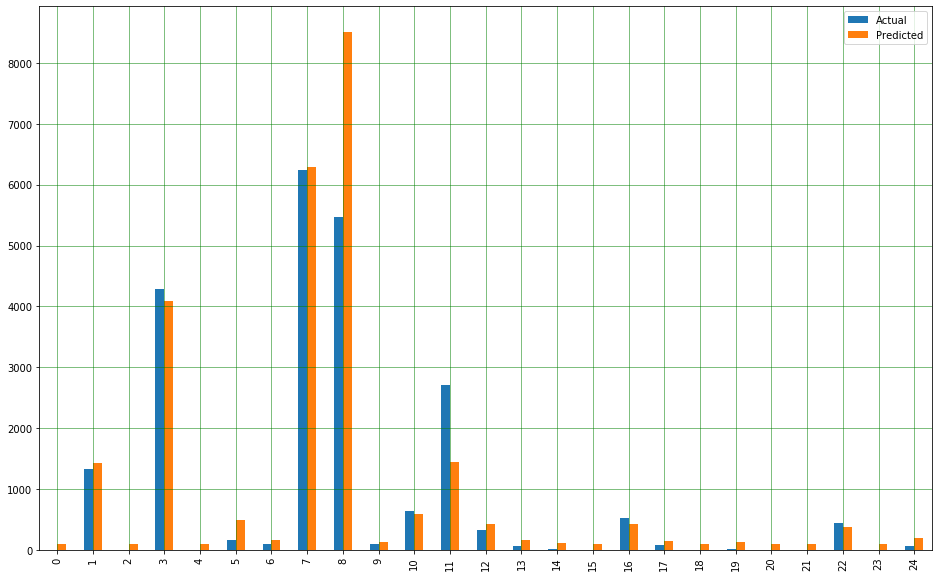

In [29]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

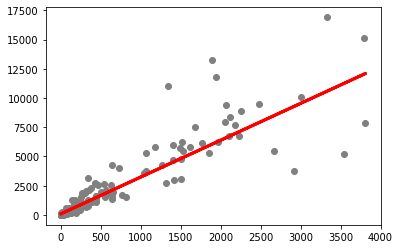

In [32]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.show()

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 359.6785795663328
Mean Squared Error: 934016.2089597265
Root Mean Squared Error: 966.445140170784


# Random Forest

In [34]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('Auto_theft.csv')
features.head(100)

,AreaName,Year,GroupName,SubGroupName,AutoTheftCoordinatedTraced,AutoTheftRecovered,AutoTheftStolen,SuccessRate
0,Andaman & Nicobar Islands,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0,4,4,1.000000
1,Andhra Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,136,1311,2725,0.481101
2,Arunachal Pradesh,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0,21,27,0.777778
3,Assam,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0,94,205,0.458537
4,Bihar,2001,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,44,205,946,0.216702
...,...,...,...,...,...,...,...,...
95,Tamil Nadu,2003,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,1107,3013,4317,0.697938
96,Tripura,2003,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0,6,52,0.115385
97,Uttar Pradesh,2003,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,21,920,3376,0.272512
98,Uttarakhand,2003,AT1-Motor Cycles/ Scooters,1. Motor Cycles/ Scooters,0,83,269,0.308550


In [55]:
# Labels are the values we want to predict
labels = np.array(features['SuccessRate'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('SuccessRate', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [47]:
print("Training Features Shape:", train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
# Training Features Shape: (261, 14)
# Training Labels Shape: (261,)
# Testing Features Shape: (87, 14)
# Testing Labels Shape: (87,)

Training Features Shape: (1398, 7)
Training Labels Shape: (1398,)
Testing Features Shape: (467, 7)
Testing Labels Shape: (467,)


In [ ]:

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);